In [32]:
from bs4 import BeautifulSoup
import requests
from bs4.element import Comment
import os
from scipy.interpolate import interp1d

import sys

sys.path.append('/Users/brianlenardo/Research/DarkMatterLimits/Software/NeutrinoFog/src')

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams.update({'font.size': 18})

PLOT_LOWER_XLIM = 0.4
PLOT_UPPER_XLIM = 1000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-37

from PlotFuncs import *
from Like import *


In [33]:
def ProcessDMLimitPlotterData( filename ):
    
    # If it's delimited by semicolons:
    
    string_data = np.genfromtxt(filename,delimiter=';',dtype=str)
    
    if string_data.size>1:
        list_data = []
        for string in string_data:
            splitstr = string.split(' ')
            temp_array = np.array([float(substr) for substr in splitstr if substr])
            list_data.append(temp_array)

        array_data = np.array(list_data)
        return array_data
    else:
        data = np.genfromtxt(filename)
        xdata = data[0::2]
        ydata = data[1::2]
        
        return np.transpose(np.array([xdata,ydata]))
    

In [34]:
datafiles = os.listdir('Data/Raw/')
dict_list = []


for thisfile in datafiles:
    thisdict = {}
    print(thisfile)
    if 'darkside50_s2only' in thisfile: continue
    if 'digitized' in thisfile: continue
    thisdict['data'] = ProcessDMLimitPlotterData('Data/Raw/'+thisfile)
    thisdict['experiment'] = thisfile.split('_')[0]
    thisdict['type'] = thisfile.split('_')[1]
    if 'xenon' in thisdict['experiment'] or\
        'lux' in thisdict['experiment'] or\
        'panda' in thisdict['experiment']:
        thisdict['material'] = 'LXe TPCs'
    elif 'cdms' in thisdict['experiment'] or\
        'cresst' in thisdict['experiment']:
        thisdict['material'] = 'Solid State'
    elif 'deap' in thisdict['experiment'] or\
        'darkside' in thisdict['experiment']:
        thisdict['material'] = 'Liquid Argon'
    else:
        thisdict['material'] = 'Other'
        
    thisdict['function'] = interp1d(np.log10(thisdict['data'][:,0]),\
                                    np.log10(thisdict['data'][:,1]))
        
    dict_list.append(thisdict)
    
thisdict={}
thisdict['data']  = np.genfromtxt('Data/Raw/darkside50_s2only_si.txt',\
                                  delimiter=',')
thisdict['type'] = 's2onlyfinal'
thisdict['experiment'] = 'darkside'
thisdict['material'] = 'Liquid Argon'
thisdict['function'] = interp1d(np.log10(thisdict['data'][:,0]),\
                               np.log10(thisdict['data'][:,1]))

dict_list.append(thisdict)
    
df = pd.DataFrame(dict_list)
        
    
    
df.head(n=30)


xenon1t_migdal_si.txt
xenon1t_migdal_si_digitized.txt
xenon1t_s2only_si.txt
darkside50_final_si.txt
deap_final_si.txt
cdmsii_final_si.txt
cdmslite_final_si.txt
newsg_si.txt
pico_final_si.txt
cresstiii_final_si.txt
pandax_final_si.txt
xenon1t_s2only_si_digitized.txt
darkside50_s2only_si.txt
lux_final_si.txt
xenon1t_final_si.txt


,data,experiment,type,material,function
0,"[[0.11, 2.80297860981593e-35], [0.12, 1.390059...",xenon1t,migdal,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
1,"[[2.73, 9.288431945297945e-40], [2.75, 6.31927...",xenon1t,s2only,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
2,"[[0.0158489, 2.3e-38], [0.0177828, 3.43284e-40...",darkside50,final,Liquid Argon,<scipy.interpolate.interpolate.interp1d object...
3,"[[14.0, 8.32723e-38], [16.0, 1.1532e-39], [18....",deap,final,Liquid Argon,<scipy.interpolate.interpolate.interp1d object...
4,"[[6.79043, 7.36005e-40], [7.14582, 3.34708e-40...",cdmsii,final,Solid State,<scipy.interpolate.interpolate.interp1d object...
5,"[[1.5, 1.78386e-38], [1.6, 5.30218e-39], [1.7,...",cdmslite,final,Solid State,<scipy.interpolate.interpolate.interp1d object...
6,"[[0.5, 0.437521], [0.7, 0.116892], [1.0, 0.055...",newsg,si.txt,Other,<scipy.interpolate.interpolate.interp1d object...
7,"[[2.7542, 2.885e-39], [3.02, 1.9855e-40], [3.3...",pico,final,Other,<scipy.interpolate.interpolate.interp1d object...
8,"[[0.160222, 10329.0], [0.163426, 2553.05], [0....",cresstiii,final,Solid State,<scipy.interpolate.interpolate.interp1d object...
9,"[[5.01187, 8.09215e-43], [6.30957, 6.03411e-44...",pandax,final,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...


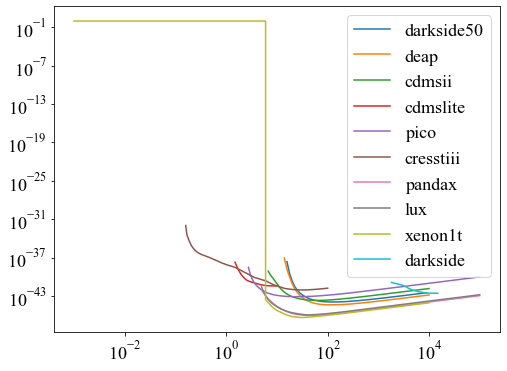

In [35]:


for index,row in df.iterrows():
    if 'cresst' in row['experiment']:
        yscale = 1e-24*1e-12
    elif 'lux' in row['experiment']:
        yscale = 1e-24 * 1e-21
    else:
        yscale=1
        
    if 'darkside' in row['experiment']:
        xscale = 1000.
    else:
        xscale=1
        
    
    if 'final' in row['type']:
        plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
                 label=row['experiment'])
        plt.xscale('log')
        plt.yscale('log')
        
plt.legend()
        
        

In [36]:
neutrino_bkg = np.genfromtxt('Data/ProjectionsDigitized/cenns_background.txt',\
                            delimiter=',')


In [37]:
def MinimumLimitCurve( input_df, cut, experiment=None):
    xvals = np.logspace(-2.,4.,1000)
    yvals = np.ones(1000)
    
    for i in range(len(xvals)):
        for index, row in input_df.iterrows():
            if cut not in row['type']:
                continue
            if not experiment is None:
                if not experiment in row['experiment']:
                    continue
                
            
            if 'cresst' in row['experiment']:
                yscale = 1e-24*1e-12
            elif 'lux' in row['experiment']:
                yscale = 1e-24 * 1e-21
            else:
                yscale=1

            if 'darkside50' in row['experiment'] and 's2only' not in row['type']:
                xscale = 1000.
            else:
                xscale=1
            
            
            try:
                if yvals[i] > 10**(row['function'](np.log10(xvals[i]*xscale)))*yscale:
                    yvals[i] = 10**(row['function'](np.log10(xvals[i]*xscale)))*yscale
            except ValueError:
                continue
                
    return xvals,yvals
        
        

In [38]:
xmin,ymin = MinimumLimitCurve(df,'final')

min_limit_curve_func = interp1d(xmin,ymin)

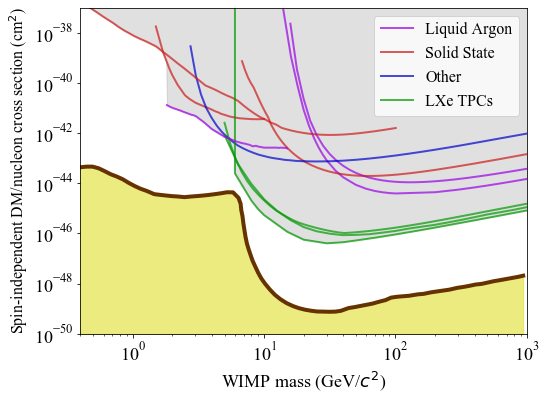

In [39]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

#plt.plot(xmin,ymin,'-k',linewidth=3,label='Limit')
plt.fill_between(xmin,ymin,np.ones(len(xmin)),color=(0.4,0.4,0.4,0.2))
materials_list = []


for index,row in df.iterrows():
    if 'cresst' in row['experiment']:
        yscale = 1e-24*1e-12
    elif 'lux' in row['experiment']:
        yscale = 1e-24 * 1e-21
    else:
        yscale=1
        
    if 'darkside' in row['experiment'] and 's2only' not in row['type']:
        xscale = 1000.
    else:
        xscale=1
        

    
    if 'final' in row['type']:
        if row['material'] in materials_list:
            this_label=''
        else:
            this_label=row['material']
            materials_list.append(row['material'])

        plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
                 label=this_label,\
                 color=colors_dict[row['material']],\
                 linewidth=2)
        plt.xscale('log')
        plt.yscale('log')
        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))

        
        
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)

plt.savefig('DM_limits_no_lxe_s2only.png',dpi=200,bbox_inches='tight')


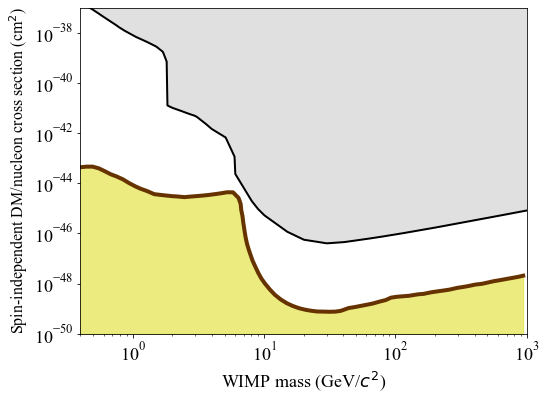

In [40]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
materials_list = []

        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))

        
        
#plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.savefig('DM_limits_no_lxe_s2only_no_limits.png',dpi=200,bbox_inches='tight')



In [41]:
xenon_s2only = np.genfromtxt('Data/Raw/xenon1t_s2only_si_digitized.txt',delimiter=',')
llnl_max = np.genfromtxt('Data/ProjectionsDigitized/xenonhypothetical_sensitivity_projected.txt',delimiter=',')
xenon_migdal = np.genfromtxt('Data/Raw/xenon1t_migdal_si_digitized.txt',delimiter=',')



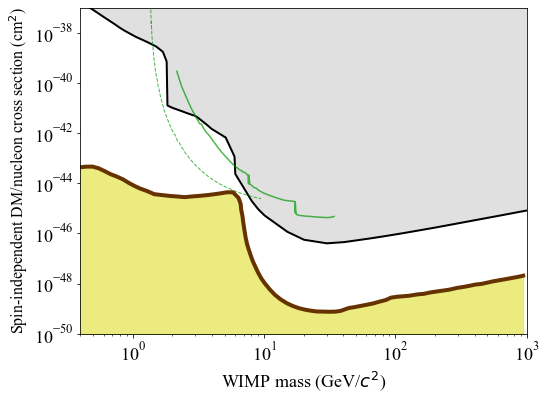

In [42]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
plt.plot(xenon_s2only[:,0],xenon_s2only[:,1],\
         color=colors_dict['LXe TPCs'],label='XENON1T S2-only')
plt.plot(llnl_max[:,0],llnl_max[:,1],\
         color=colors_dict['LXe TPCs'],\
         label='0 bkg, 10 kg-yr, 2e threshold',\
        linewidth=1,linestyle='--')
materials_list = []

        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))


        
        
#plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
plt.xscale('log')
plt.yscale('log')

#plt.savefig('DM_limits_no_lxe_s2only_no_limits.png',dpi=200,bbox_inches='tight')



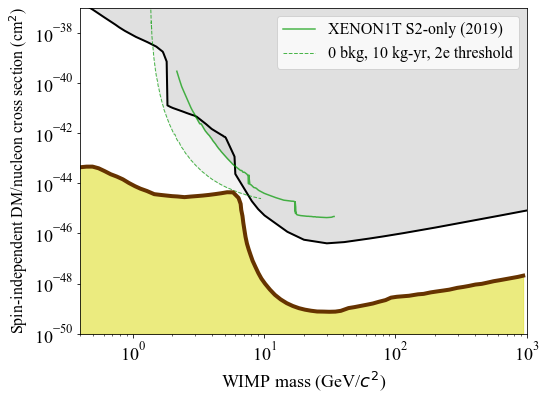

In [43]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
plt.plot(xenon_s2only[:,0],xenon_s2only[:,1],\
         color=colors_dict['LXe TPCs'],label='XENON1T S2-only (2019)')

mask = xenon_s2only[:,1] < min_limit_curve_func(xenon_s2only[:,0])
plt.fill_between(xenon_s2only[mask,0],\
                 xenon_s2only[mask,1],min_limit_curve_func(xenon_s2only[mask,0]),\
                 color=(0.4,0.4,0.4,0.2))

mask = llnl_max[:,1] < min_limit_curve_func(llnl_max[:,0])
plt.plot(llnl_max[:,0],llnl_max[:,1],\
         color=colors_dict['LXe TPCs'],\
         label='0 bkg, 10 kg-yr, 2e threshold',\
        linewidth=1,linestyle='--')
plt.fill_between(llnl_max[mask,0],llnl_max[mask,1],\
                 min_limit_curve_func(llnl_max[mask,0]),\
                 color=(0.7,0.7,0.7,0.15))



materials_list = []

        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))


        
        
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.savefig('DM_limits_with_lxe_s2only_no_limits.png',dpi=200,bbox_inches='tight')


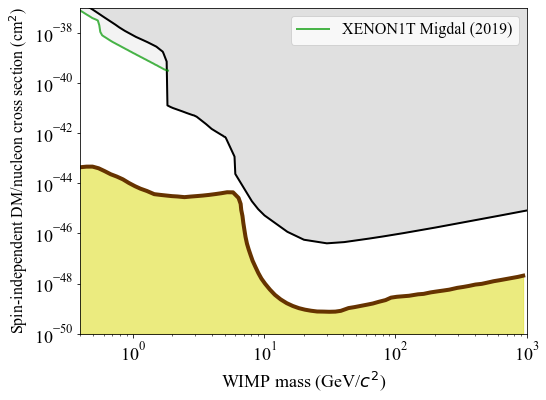

In [44]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))


# plt.plot(xenon_s2only[:,0],xenon_s2only[:,1],\
#          color=colors_dict['LXe TPCs'],label='XENON1T S2-only (2019)')

# mask = xenon_s2only[:,1] < min_limit_curve_func(xenon_s2only[:,0])
# plt.fill_between(xenon_s2only[mask,0],\
#                  xenon_s2only[mask,1],min_limit_curve_func(xenon_s2only[mask,0]),\
#                  color=(0.4,0.4,0.4,0.2))

mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
         color=colors_dict['LXe TPCs'],\
         label='XENON1T Migdal (2019)',\
        linewidth=2,linestyle='-')
plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
                 min_limit_curve_func(xenon_migdal[mask,0]),\
                 color=(0.7,0.7,0.7,0.15))

# print(xenon_migdal[mask])
# print(xenon_migdal)
# print(min_limit_curve_func(xenon_migdal[:,0]))





materials_list = []

        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))


        
        
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
# # plt.ylim(1.e-38,1e-32)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.savefig('DM_limits_with_lxe_s2only_migdal.png',dpi=200,bbox_inches='tight')


# Adding projections

In [45]:
datafiles = os.listdir('Data/ProjectionsDigitized/')
dict_list = []


for thisfile in datafiles:
    thisdict = {}
    print(thisfile)
    thisdict['data'] = np.genfromtxt('Data/ProjectionsDigitized/'+thisfile,delimiter=',')
    thisdict['experiment'] = thisfile.split('_')[0]
    thisdict['type'] = thisfile.split('_')[-1]
    if 'xenon' in thisdict['experiment'] or\
        'lux' in thisdict['experiment'] or\
        'panda' in thisdict['experiment'] or\
        'lz' in thisdict['experiment']:
        thisdict['material'] = 'LXe TPCs'
    elif 'cdms' in thisdict['experiment'] or\
        'cresst' in thisdict['experiment']:
        thisdict['material'] = 'Solid State'
    elif 'deap' in thisdict['experiment'] or\
        'darkside' in thisdict['experiment']:
        thisdict['material'] = 'Liquid Argon'
    else:
        thisdict['material'] = 'Other'
        
    thisdict['function'] = interp1d(np.log10(thisdict['data'][:,0]),\
                                    np.log10(thisdict['data'][:,1]))
        
    dict_list.append(thisdict)
    
df_proj = pd.DataFrame(dict_list)
        
    
    
df_proj.head(n=10)

supercdms_siizip_sensitivity.txt
supercdms_sihv_sensitivity.txt
xenonhypothetical_sensitivity_projected.txt
darkside20k_si_sensitivity.txt
supercdms_geizip_sensitivity.txt
xenonnt_sensitivity.txt
cenns_background.txt
lz_sensitivity.txt
supercdms_gehv_sensitivity.txt


,data,experiment,type,material,function
0,"[[0.6186878865785411, 4.5616563753190176e-39],...",supercdms,sensitivity.txt,Solid State,<scipy.interpolate.interpolate.interp1d object...
1,"[[0.4087138361811954, 1.902284816797888e-39], ...",supercdms,sensitivity.txt,Solid State,<scipy.interpolate.interpolate.interp1d object...
2,"[[1.3480560461773707, 7.303546758122108e-37], ...",xenonhypothetical,projected.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
3,"[[10.532811225866759, 4.921866334667368e-42], ...",darkside20k,sensitivity.txt,Liquid Argon,<scipy.interpolate.interpolate.interp1d object...
4,"[[1.2704631683343015, 2.607067722649155e-39], ...",supercdms,sensitivity.txt,Solid State,<scipy.interpolate.interpolate.interp1d object...
5,"[[5.944877574540511, 2.5217713639341622e-45], ...",xenonnt,sensitivity.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
6,"[[0.3230637584433028, 5.06980213888368e-44], [...",cenns,background.txt,Other,<scipy.interpolate.interpolate.interp1d object...
7,"[[3.327330286346403, 3.233426230621968e-43], [...",lz,sensitivity.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
8,"[[0.46018457051546874, 5.623335508627947e-38],...",supercdms,sensitivity.txt,Solid State,<scipy.interpolate.interpolate.interp1d object...


In [46]:
xmin_proj_supercdms,ymin_proj_supercdms = MinimumLimitCurve(df_proj,'sensitivity', experiment='supercdms')
xmin_proj_lz,ymin_proj_lz = MinimumLimitCurve(df_proj,'sensitivity', experiment='lz')
xmin_proj,ymin_proj = MinimumLimitCurve(df_proj,'sensitivity')

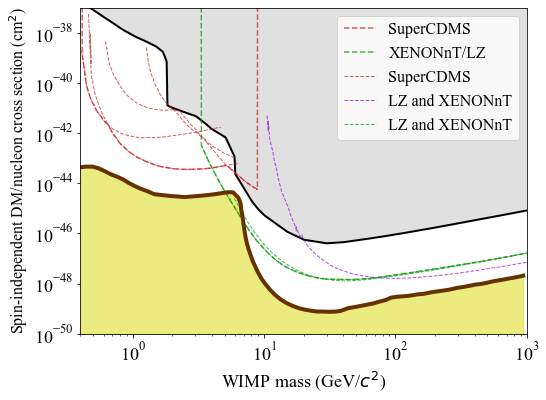

In [47]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
# plt.fill_between(xmin_proj_supercdms,ymin_proj_supercdms,np.ones(len(xmin)),\
#                  color=(0.7,0.7,0.7,0.15))
materials_list = []

plt.plot(xmin_proj_supercdms,ymin_proj_supercdms,'--',color=colors_dict['Solid State'],label='SuperCDMS')
plt.plot(xmin_proj_lz,ymin_proj_lz,'--',color=colors_dict['LXe TPCs'],label='XENONnT/LZ')
for index,row in df_proj.iterrows():
    if 'cresst' in row['experiment']:
        yscale = 1e-24*1e-12
    elif 'lux' in row['experiment']:
        yscale = 1e-24 * 1e-21
    else:
        yscale=1
        
    if 'darkside50' in row['experiment'] and 's2only' not in row['type']:
        xscale = 1000.
    else:
        xscale=1
        

    
    if 'sensitivity' in row['type']:
        if 'hypothetical' in row['experiment']: continue
        if row['material'] in materials_list:
            this_label=''
        else:
            if 'cdms' in row['experiment']:
                this_label='SuperCDMS'
            else:
                this_label=row['material']
                this_label='LZ and XENONnT'
            materials_list.append(row['material'])

        plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
                 label=this_label,\
                 color=colors_dict[row['material']],\
                 linewidth=1,linestyle='--')
plt.xscale('log')
plt.yscale('log')
        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))

        
        
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)

plt.savefig('DM_limits_no_lxe_s2only_with_projections.png',dpi=200,bbox_inches='tight')




In [48]:
darkside20k_migdal = np.genfromtxt('Data/darkside20k_migdalprojection_si.txt',delimiter=',')
darkside20k_normal = np.genfromtxt('Data/darkside20k_si_normal_limit.txt',delimiter=',')
hydrox_s23e = np.genfromtxt('Data/hydrox_s2only_3e.txt',delimiter=',')
hydrox_s25e = np.genfromtxt('Data/hydrox_s2only_5e.txt',delimiter=',')
hydrox_s1s2 = np.genfromtxt('Data/hydrox_s1s2.txt',delimiter=',')

neutrino_floor = loadtxt('Data/DLNuFloorXe_detailed_SI.txt')
m,sig,NUFLOOR,DY = Floor_2D(neutrino_floor,filt=True,filt_width=2,Ex_crit=1e10)




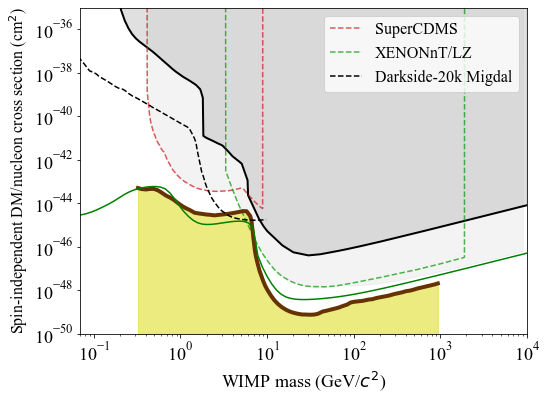

In [49]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.07
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
plt.fill_between(xmin_proj,ymin_proj,np.ones(len(xmin)),\
                 color=(0.7,0.7,0.7,0.15))
materials_list = []

plt.plot(xmin_proj_supercdms,ymin_proj_supercdms,'--',color=colors_dict['Solid State'],label='SuperCDMS')
plt.plot(xmin_proj_lz,ymin_proj_lz,'--',color=colors_dict['LXe TPCs'],label='XENONnT/LZ')

# for index,row in df_proj.iterrows():
#     if 'cresst' in row['experiment']:
#         yscale = 1e-24*1e-12
#     elif 'lux' in row['experiment']:
#         yscale = 1e-24 * 1e-21
#     else:
#         yscale=1
        
#     if 'darkside' in row['experiment'] and 's2only' not in row['type']:
#         xscale = 1000.
#     else:
#         xscale=1
        

    
#     if 'sensitivity' in row['type']:
#         if 'hypothetical' in row['experiment']: continue
#         if row['material'] in materials_list:
#             this_label=''
#         else:
#             if 'cdms' in row['experiment']:
#                 this_label='SuperCDMS'
#             else:
#                 this_label=row['material']
#                 this_label='LZ and XENONnT'
#             materials_list.append(row['material'])

#         plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
#                  label=this_label,\
#                  color=colors_dict[row['material']],\
#                  linewidth=1,linestyle='--')
plt.xscale('log')
plt.yscale('log')
        
plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(neutrino_bkg[:,0],\
                 np.ones(len(neutrino_bkg))*1.e-50,neutrino_bkg[:,1],\
                color=(0.85,0.85,0.,0.5))

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--k',label='Darkside-20k Migdal')

# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   
    
    
    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)

plt.plot(m,NUFLOOR,'-g')

plt.savefig('DM_limits_no_lxe_s2only_with_projections.png',dpi=200,bbox_inches='tight')



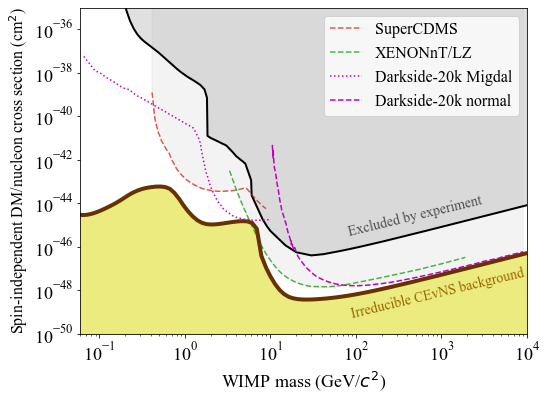

In [50]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
plt.fill_between(xmin_proj,ymin_proj,np.ones(len(xmin)),\
                 color=(0.7,0.7,0.7,0.15))
materials_list = []

mask = ymin_proj_supercdms < 1.e-36
plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# plt.fill_between(xmin_proj_supercdms,ymin_proj,np.ones(len(xmin)),\
#                  color=(0.7,0.7,0.7,0.15))
mask = ymin_proj_lz < 1.e-36
plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color=colors_dict['LXe TPCs'],label='XENONnT/LZ')
# plt.fill_between(xmin_proj,ymin_proj,np.ones(len(xmin)),\
#                  color=(0.7,0.7,0.7,0.15))

# for index,row in df_proj.iterrows():
#     if 'cresst' in row['experiment']:
#         yscale = 1e-24*1e-12
#     elif 'lux' in row['experiment']:
#         yscale = 1e-24 * 1e-21
#     else:
#         yscale=1
        
#     if 'darkside' in row['experiment'] and 's2only' not in row['type']:
#         xscale = 1000.
#     else:
#         xscale=1
        

    
#     if 'sensitivity' in row['type']:
#         if 'hypothetical' in row['experiment']: continue
#         if row['material'] in materials_list:
#             this_label=''
#         else:
#             if 'cdms' in row['experiment']:
#                 this_label='SuperCDMS'
#             else:
#                 this_label=row['material']
#                 this_label='LZ and XENONnT'
#             materials_list.append(row['material'])

#         plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
#                  label=this_label,\
#                  color=colors_dict[row['material']],\
#                  linewidth=1,linestyle='--')
plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':m',label='Darkside-20k Migdal')
plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--m',label='Darkside-20k normal')
# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   
    
# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='XENON1T Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color=(0.7,0.7,0.7,0.15))
    
# plt.plot(llnl_max[:,0],llnl_max[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='0 bkg, 10 kg-yr, 2e threshold',\
#         linewidth=1,linestyle='--')

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.8,0.05,'Irreducible CEvNS background',
         fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)

plt.text(0.75,0.3,'Excluded by experiment',
         fontsize=14,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)



plt.savefig('DM_limits_no_lxe_s2only_with_projections.png',dpi=200,bbox_inches='tight')


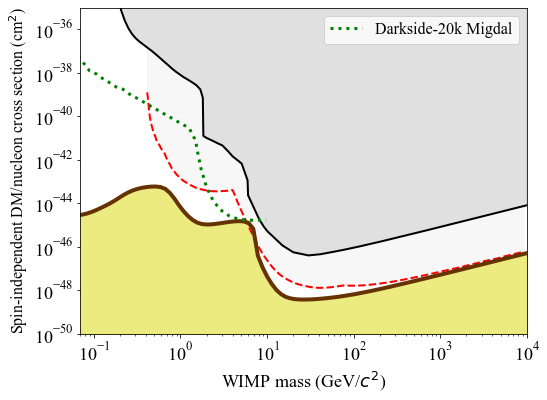

In [51]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.07
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
limits_func = interp1d(xmin,ymin)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
mask = ymin_proj < 1.e-35
plt.fill_between(xmin_proj[mask],ymin_proj[mask],limits_func(xmin_proj[mask]),\
                 color=(0.7,0.7,0.7,0.1))
plt.plot(xmin_proj[mask],ymin_proj[mask],'--r',linewidth=2)
materials_list = []

mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# # plt.fill_between(xmin_proj_supercdms,ymin_proj,np.ones(len(xmin)),\
# #                  color=(0.7,0.7,0.7,0.15))
# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color=colors_dict['LXe TPCs'],label='XENONnT/LZ')
# # plt.fill_between(xmin_proj,ymin_proj,np.ones(len(xmin)),\
# #                  color=(0.7,0.7,0.7,0.15))

# for index,row in df_proj.iterrows():
#     if 'cresst' in row['experiment']:
#         yscale = 1e-24*1e-12
#     elif 'lux' in row['experiment']:
#         yscale = 1e-24 * 1e-21
#     else:
#         yscale=1
        
#     if 'darkside' in row['experiment'] and 's2only' not in row['type']:
#         xscale = 1000.
#     else:
#         xscale=1
        

    
#     if 'sensitivity' in row['type']:
#         if 'hypothetical' in row['experiment']: continue
#         if row['material'] in materials_list:
#             this_label=''
#         else:
#             if 'cdms' in row['experiment']:
#                 this_label='SuperCDMS'
#             else:
#                 this_label=row['material']
#                 this_label='LZ and XENONnT'
#             materials_list.append(row['material'])

#         plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
#                  label=this_label,\
#                  color=colors_dict[row['material']],\
#                  linewidth=1,linestyle='--')
plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--m',label='Darkside-20k normal')
# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   
    
# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='XENON1T Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color=(0.7,0.7,0.7,0.15))
    
# plt.plot(llnl_max[:,0],llnl_max[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='0 bkg, 10 kg-yr, 2e threshold',\
#         linewidth=1,linestyle='--')

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)




plt.savefig('DM_limits_no_lxe_s2only_with_projections.png',dpi=200,bbox_inches='tight')


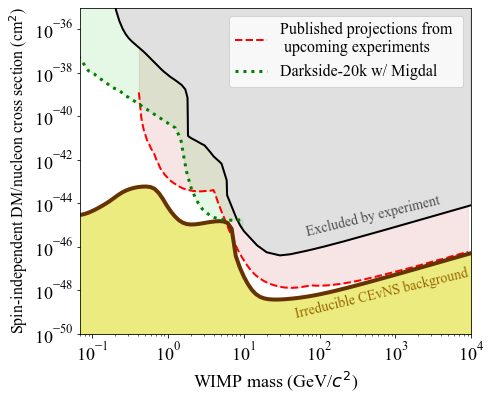

In [52]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}

plt.rcParams['figure.figsize'] = [7, 6]
plt.rcParams.update({'font.size': 18})


PLOT_LOWER_XLIM = 0.07
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
limits_func = interp1d(xmin,ymin)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))
mask = ymin_proj < 1.e-35
plt.fill_between(xmin_proj[mask],ymin_proj[mask],limits_func(xmin_proj[mask]),\
                 color=(0.7,0.,0.,0.1))
plt.plot(xmin_proj[mask],ymin_proj[mask],'--r',linewidth=2,label='Published projections from \n upcoming experiments')
materials_list = []

mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# # plt.fill_between(xmin_proj_supercdms,ymin_proj,np.ones(len(xmin)),\
# #                  color=(0.7,0.7,0.7,0.15))
# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color=colors_dict['LXe TPCs'],label='XENONnT/LZ')
# # plt.fill_between(xmin_proj,ymin_proj,np.ones(len(xmin)),\
# #                  color=(0.7,0.7,0.7,0.15))

# for index,row in df_proj.iterrows():
#     if 'cresst' in row['experiment']:
#         yscale = 1e-24*1e-12
#     elif 'lux' in row['experiment']:
#         yscale = 1e-24 * 1e-21
#     else:
#         yscale=1
        
#     if 'darkside' in row['experiment'] and 's2only' not in row['type']:
#         xscale = 1000.
#     else:
#         xscale=1
        

    
#     if 'sensitivity' in row['type']:
#         if 'hypothetical' in row['experiment']: continue
#         if row['material'] in materials_list:
#             this_label=''
#         else:
#             if 'cdms' in row['experiment']:
#                 this_label='SuperCDMS'
#             else:
#                 this_label=row['material']
#                 this_label='LZ and XENONnT'
#             materials_list.append(row['material'])

#         plt.plot(xscale*row['data'][:,0],row['data'][:,1]*yscale,\
#                  label=this_label,\
#                  color=colors_dict[row['material']],\
#                  linewidth=1,linestyle='--')
plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
# plt.plot(neutrino_bkg[:,0],neutrino_bkg[:,1],\
#          color='k',linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k w/ Migdal')
plt.fill_between(darkside20k_migdal[:,0],darkside20k_migdal[:,1],limits_func(darkside20k_migdal[:,0]),\
                 color=(0.,0.7,0.,0.1),label='')


# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--m',label='Darkside-20k normal')
# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   
    
# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='XENON1T Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color=(0.7,0.7,0.7,0.15))
    
# plt.plot(llnl_max[:,0],llnl_max[:,1],\
#          color=colors_dict['LXe TPCs'],\
#          label='0 bkg, 10 kg-yr, 2e threshold',\
#         linewidth=1,linestyle='--')

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
plt.text(0.77,0.05,'Irreducible CEvNS background',
         fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)

plt.text(0.75,0.3,'Excluded by experiment',
         fontsize=14,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)




plt.savefig('DM_limits_no_lxe_s2only_with_projections.png',dpi=200,bbox_inches='tight')


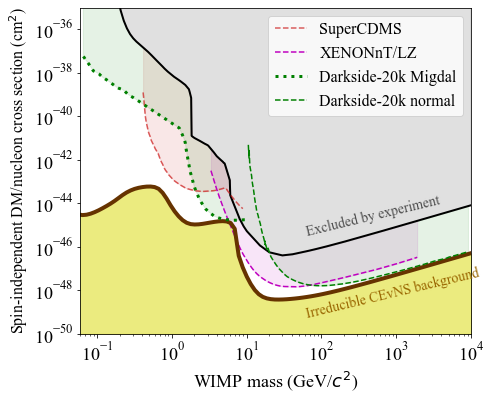

In [53]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

mask = ymin_proj_supercdms < 1.e-36
plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
                 color=colors_dict['Solid State'],alpha=0.1)


mask = ymin_proj_lz < 1.e-36
plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
                 color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
                 color='g',alpha=0.1)
mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
                 color='g',alpha=0.1)

# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/$c^2$)')
plt.ylabel(r'Spin-independent DM/nucleon cross section (cm$^2$)',\
           fontsize=16)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.8,0.05,'Irreducible CEvNS background',
         fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)

plt.text(0.75,0.3,'Excluded by experiment',
         fontsize=14,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)



plt.savefig('DM_limits_projections_individual.png',dpi=200,bbox_inches='tight')

In [79]:
df_proj.head(n=20)
ss_mask = df_proj['material'] == 'Solid State'
nl_mask = (df_proj['material'] == 'LXe TPCs') | (df_proj['material'] == 'Liquid Argon')
xe_mask = (df_proj['material'] == 'LXe TPCs')

dfss = df_proj.loc[ss_mask]
dfnl = df_proj.loc[nl_mask]
dfxe = df_proj.loc[xe_mask]

xmin_nl,ymin_nl = MinimumLimitCurve(dfnl,'sensitivity')
xmin_ss,ymin_ss = MinimumLimitCurve(dfss,'sensitivity')
xmin_xe,ymin_xe = MinimumLimitCurve(dfxe,'sensitivity')



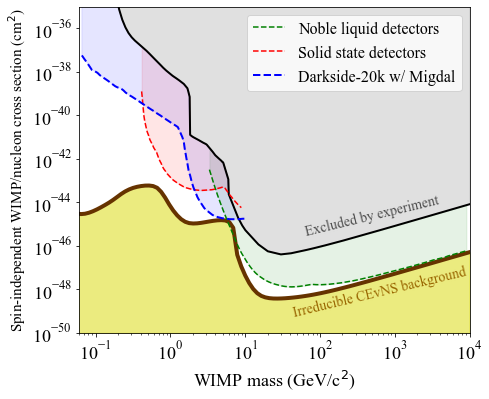

In [55]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
mask = ymin_nl < 1.e-36
plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
mask = ymin_nl < limits_func(xmin_nl)
plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
                 color='g',alpha=0.1)

mask = ymin_ss < 1.e-36
plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
mask = ymin_ss < limits_func(xmin_ss)
plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
                 color='r',alpha=0.1)

# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color='b',\
#          label='XENON1T w/ Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color='b',alpha=0.1)

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--b',linewidth=2,label='Darkside-20k w/ Migdal')
mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
                 color='b',alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.77,0.05,'Irreducible CEvNS background',
         fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)

plt.text(0.75,0.3,'Excluded by experiment',
         fontsize=14,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)


plt.savefig('DM_limits_projections_individual.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')



No handles with labels found to put in legend.


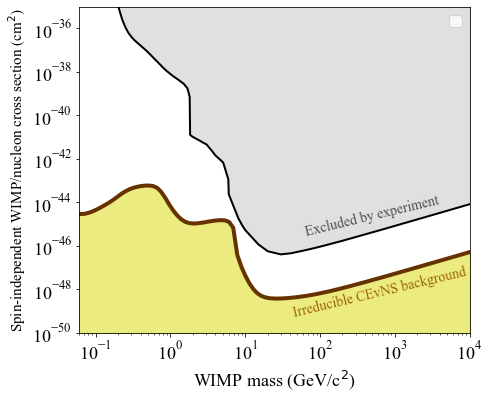

In [56]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
# mask = ymin_nl < 1.e-36
# plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
# mask = ymin_nl < limits_func(xmin_nl)
# plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
#                  color='g',alpha=0.1)

# mask = ymin_ss < 1.e-36
# plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
# mask = ymin_ss < limits_func(xmin_ss)
# plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
#                  color='r',alpha=0.1)

# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color='b',\
#          label='XENON1T w/ Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color='b',alpha=0.1)

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--b',linewidth=2,label='Darkside-20k w/ Migdal')
# mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
# plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
#                  color='b',alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.77,0.05,'Irreducible CEvNS background',
         fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)

plt.text(0.75,0.3,'Excluded by experiment',
         fontsize=14,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=13.5)


plt.savefig('DM_limits_projections_individual.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')

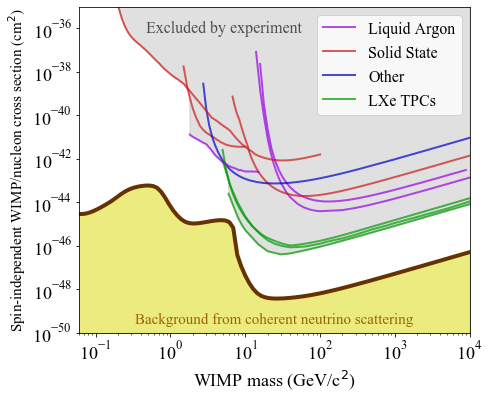

In [90]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


# plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
# mask = ymin_nl < 1.e-36
# plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
# mask = ymin_nl < limits_func(xmin_nl)
# plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
#                  color='g',alpha=0.1)

# mask = ymin_ss < 1.e-36
# plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
# mask = ymin_ss < limits_func(xmin_ss)
# plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
#                  color='r',alpha=0.1)

# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color='b',\
#          label='XENON1T w/ Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color='b',alpha=0.1)

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--b',linewidth=2,label='Darkside-20k w/ Migdal')
# mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
# plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
#                  color='b',alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   
for index,row in df.iterrows():
    if 'cresst' in row['experiment']:
        yscale = 1e-24*1e-12
    elif 'lux' in row['experiment']:
        yscale = 1e-24 * 1e-21
    else:
        yscale=1
        
    if 'darkside' in row['experiment'] and 's2only' not in row['type']:
        xscale = 1000.
    else:
        xscale=1
        

    
    if 'final' in row['type']:
        if row['material'] in materials_list:
            this_label=''
        else:
            this_label=row['material']
            materials_list.append(row['material'])

        mask = row['data'][:,1]*yscale < 1.e-35
            
        plt.plot(xscale*row['data'][mask,0],row['data'][mask,1]*yscale,\
                 label=this_label,\
                 color=colors_dict[row['material']],\
                 linewidth=2)
        plt.xscale('log')
        plt.yscale('log')
        


    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
# plt.text(0.77,0.05,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center',rotation=13.5)
plt.text(0.5,0.03,'Background from coherent neutrino scattering',
         fontsize=15,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

plt.text(0.37,0.92,'Excluded by experiment',
         fontsize=16,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)


plt.savefig('DM_limits_current.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')

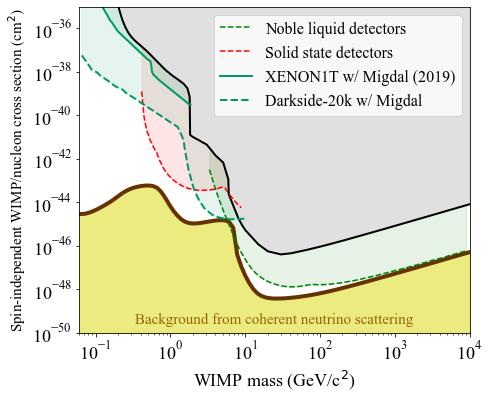

In [100]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
mask = ymin_nl < 1.e-36
plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
mask = ymin_nl < limits_func(xmin_nl)
plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
                 color='g',alpha=0.1)

mask = ymin_ss < 1.e-36
plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
mask = ymin_ss < limits_func(xmin_ss)
plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
                 color='r',alpha=0.1)

migdal_color = (0.,0.6,0.4)

mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
         color=migdal_color,\
         label='XENON1T w/ Migdal (2019)',\
        linewidth=2,linestyle='-')
plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
                 min_limit_curve_func(xenon_migdal[mask,0]),\
                 color=migdal_color,alpha=0.1)

plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--',color=migdal_color,linewidth=2,label='Darkside-20k w/ Migdal')
mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
                 color=migdal_color,alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc='upper right')
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.5,0.03,'Background from coherent neutrino scattering',
         fontsize=15,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

# plt.text(0.37,0.92,'Excluded by experiment',
#          fontsize=16,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
#         ha='center',rotation=0.)

plt.savefig('DM_limits_projections_.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')

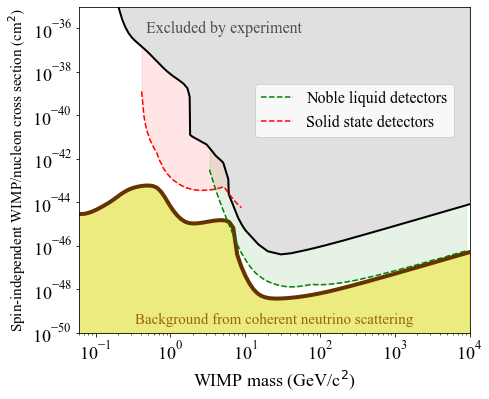

In [95]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
mask = ymin_nl < 1.e-36
plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
mask = ymin_nl < limits_func(xmin_nl)
plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
                 color='g',alpha=0.1)

# mask = ymin_xe < 1.e-36
# plt.plot(xmin_xe[mask],ymin_xe[mask],'--g',label='Liquid Xe TPCs')
# mask = ymin_xe < limits_func(xmin_xe)
# plt.fill_between(xmin_xe[mask],ymin_xe[mask],limits_func(xmin_xe[mask]),\
#                  color='g',alpha=0.1)

dsmask = dfnl['experiment'] == 'darkside20k'
# print(dfnl['data'].loc[dsmask].values)
xmin_ds = dfnl['data'].loc[dsmask].values[0][:,0]
ymin_ds = dfnl['data'].loc[dsmask].values[0][:,1]

# mask = ymin_ds < 1.e-36
# plt.plot(xmin_ds[mask],ymin_ds[mask],'--m',label='Liquid Ar TPCs')
# mask = ymin_ds < limits_func(xmin_ds)
# plt.fill_between(xmin_ds[mask],ymin_ds[mask],limits_func(xmin_ds[mask]),\
#                  color='m',alpha=0.1)

mask = ymin_ss < 1.e-36
plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
mask = ymin_ss < limits_func(xmin_ss)
plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
                 color='r',alpha=0.1)

# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color='b',\
#          label='XENON1T w/ Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color='b',alpha=0.1)

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--b',linewidth=2,label='Darkside-20k w/ Migdal')
# mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
# plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
#                  color='b',alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc=(0.45,0.6))
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.5,0.03,'Background from coherent neutrino scattering',
         fontsize=15,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

plt.text(0.37,0.92,'Excluded by experiment',
         fontsize=16,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

plt.savefig('DM_limits_published_projections_by_expt.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')

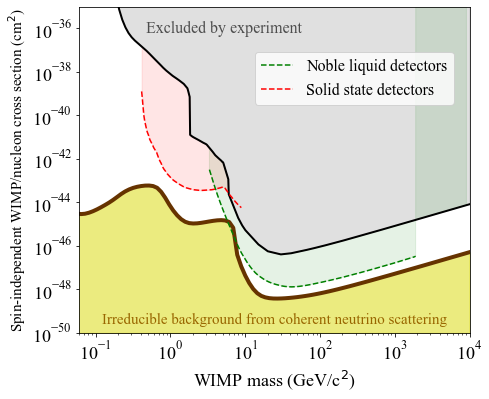

In [96]:
colors_dict = {'Liquid Argon':(0.6,0.,0.9,0.7),
               'LXe TPCs':(0.,0.6,0.,0.7),
               'Solid State':(0.8,0.1,0.1,0.7),
               'Other':(0.,0.,0.8,0.7)}


PLOT_LOWER_XLIM = 0.06
PLOT_UPPER_XLIM = 10000
PLOT_LOWER_YLIM = 1.e-50
PLOT_UPPER_YLIM = 1.e-35


plt.plot(xmin,ymin,'-k',linewidth=2)
plt.fill_between(xmin,ymin,np.ones(len(xmin)),\
                 color=(0.4,0.4,0.4,0.2))

materials_list = []

# mask = ymin_proj_supercdms < 1.e-36
# plt.plot(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],'--',color=colors_dict['Solid State'],label='SuperCDMS')
# mask = ymin_proj_supercdms < limits_func(xmin_proj_supercdms)
# plt.fill_between(xmin_proj_supercdms[mask],ymin_proj_supercdms[mask],limits_func(xmin_proj_supercdms[mask]),\
#                  color=colors_dict['Solid State'],alpha=0.1)


# mask = ymin_proj_lz < 1.e-36
# plt.plot(xmin_proj_lz[mask],ymin_proj_lz[mask],'--',color='m',label='XENONnT/LZ')
# mask = (ymin_proj_lz < limits_func(xmin_proj_lz))
# plt.fill_between(xmin_proj_lz[mask],ymin_proj_lz[mask],limits_func(xmin_proj_lz[mask]),\
#                  color='m',alpha=0.1)

    

plt.xscale('log')
plt.yscale('log')

plt.plot(m,NUFLOOR,\
         color=(0.4,0.2,0.),linewidth=4)
plt.fill_between(m,\
                 np.ones(len(NUFLOOR))*1.e-50,NUFLOOR,\
                color=(0.85,0.85,0.,0.5))

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],':g',linewidth=3,label='Darkside-20k Migdal')
# plt.plot(darkside20k_normal[:,0],darkside20k_normal[:,1],'--g',label='Darkside-20k normal')
# mask = darkside20k_normal[:,1] < limits_func(darkside20k_normal[:,0])
# plt.fill_between(darkside20k_normal[mask,0],darkside20k_normal[mask,1],limits_func(darkside20k_normal[mask,0]),\
#                  color='g',alpha=0.1)
# mask = ymin_nl < 1.e-36
# plt.plot(xmin_nl[mask],ymin_nl[mask],'--g',label='Noble liquid detectors')
# mask = ymin_nl < limits_func(xmin_nl)
# plt.fill_between(xmin_nl[mask],ymin_nl[mask],limits_func(xmin_nl[mask]),\
#                  color='g',alpha=0.1)

mask = ymin_xe < 1.e-36
plt.plot(xmin_xe[mask],ymin_xe[mask],'--g',label='Noble liquid detectors')
mask = ymin_nl < limits_func(xmin_xe)
plt.fill_between(xmin_xe[mask],ymin_xe[mask],limits_func(xmin_xe[mask]),\
                 color='g',alpha=0.1)

mask = ymin_ss < 1.e-36
plt.plot(xmin_ss[mask],ymin_ss[mask],'--r',label='Solid state detectors')
mask = ymin_ss < limits_func(xmin_ss)
plt.fill_between(xmin_ss[mask],ymin_ss[mask],limits_func(xmin_ss[mask]),\
                 color='r',alpha=0.1)

# mask = (xenon_migdal[:,1] < min_limit_curve_func(xenon_migdal[:,0]))&(xenon_migdal[:,0]>PLOT_LOWER_XLIM)
# plt.plot(xenon_migdal[:,0],xenon_migdal[:,1],\
#          color='b',\
#          label='XENON1T w/ Migdal (2019)',\
#         linewidth=2,linestyle='-')
# plt.fill_between(xenon_migdal[mask,0],xenon_migdal[mask,1],\
#                  min_limit_curve_func(xenon_migdal[mask,0]),\
#                  color='b',alpha=0.1)

# plt.plot(darkside20k_migdal[:,0],darkside20k_migdal[:,1],'--b',linewidth=2,label='Darkside-20k w/ Migdal')
# mask = darkside20k_migdal[:,1] < limits_func(darkside20k_migdal[:,0])
# plt.fill_between(darkside20k_migdal[mask,0],darkside20k_migdal[mask,1],limits_func(darkside20k_migdal[mask,0]),\
#                  color='b',alpha=0.1)




# plt.plot(hydrox_s1s2[:,0],hydrox_s1s2[:,1],'--c',label='HydroX')   
# plt.plot(hydrox_s25e[:,0],hydrox_s25e[:,1],'--c',label='')   
# plt.plot(hydrox_s23e[:,0],hydrox_s23e[:,1],'--c',label='')   

    
plt.legend(fontsize=16,loc=(0.45,0.7))
plt.xlim(PLOT_LOWER_XLIM,PLOT_UPPER_XLIM)
plt.ylim(PLOT_LOWER_YLIM,PLOT_UPPER_YLIM)
plt.xlabel(r'WIMP mass (GeV/c$^2$)')
plt.ylabel(r'Spin-independent WIMP/nucleon cross section (cm$^2$)',\
           fontsize=15)
# plt.text(0.5,0.03,'Irreducible CEvNS background',
#          fontsize=14,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
#         ha='center')
plt.text(0.5,0.03,'Irreducible background from coherent neutrino scattering',
         fontsize=15,color=(0.6,0.4,0.),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

plt.text(0.37,0.92,'Excluded by experiment',
         fontsize=16,color=(0.3,0.3,0.3),transform=plt.gca().transAxes,\
        ha='center',rotation=0.)

plt.savefig('DM_limits_published_projections.png',dpi=400,\
            bbox_inches='tight')
# plt.savefig('DM_limits_projections_individual.svg',dpi=1000,\
#             bbox_inches='tight')

In [83]:
dfnl.head()

,data,experiment,type,material,function
2,"[[1.3480560461773707, 7.303546758122108e-37], ...",xenonhypothetical,projected.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
3,"[[10.532811225866759, 4.921866334667368e-42], ...",darkside20k,sensitivity.txt,Liquid Argon,<scipy.interpolate.interpolate.interp1d object...
5,"[[5.944877574540511, 2.5217713639341622e-45], ...",xenonnt,sensitivity.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
7,"[[3.327330286346403, 3.233426230621968e-43], [...",lz,sensitivity.txt,LXe TPCs,<scipy.interpolate.interpolate.interp1d object...
